# Practial exercises with PyGLDA toolbox
---
Edited by Fan Yang (fany@plan.aau.dk) and all other members from AAU geodesy group. This document is dedicated to the summer school held by Geodesy Group, Aalborg University, Denmark. This can be used as a quick start of the PyGLDA toolbox.

**Notice**: please makre sure that this notebook is opened under the environment of **pyglda**, following these steps: navigate to the '../PyGLDA/demo/..', open a terminal and type
> conda activate pyglda
> 
> pip install jupyterlab
> 
> python -m jupyter lab
---

# Exercise-4
The task is to implement DA at a desired region: Rhine river basin

---


## 1. Load the default settings

In [1]:
from demo_summer_school import RDA, load_main_configuration_parameters,save_main_configuration_parameters

load_main_configuration_parameters()

{'basin': 'Brahmaputra3subbasins',
 'shp_path': '../data/basin/shp/Brahmaputra/Brahmaputra3subbasins_subbasins.shp',
 'case': 'Exercise_3',
 'setting_dir': '../settings/SummerSchool/Exercise_3',
 'ens': 5,
 'cold_begin_time': '2004-10-01',
 'cold_end_time': '2004-12-31',
 'warm_begin_time': '2005-01-01',
 'warm_end_time': '2005-12-31',
 'resume_begin_time': '2005-02-01',
 'resume_end_time': '2005-12-31',
 'external_data_path': '/media/user/My Book/Fan/SummerSchool/External Data',
 'res_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/res',
 'figure_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/figure'}

## 2. Modify the configuration

In [2]:
### start a new case study to avoid confusion ###
RDA.case= 'Exercise_4'
RDA.setting_dir = '../settings/SummerSchool/Exercise_4'
RDA.config_external_data() # link the setting file to the 'external data path'
RDA.ens = 10

# RDA.basin = 'MDB'
# RDA.shp_path = '../data/basin/shp/MDB_4_shapefiles/MDB_4_subbasins.shp'

RDA.basin = 'Rhine-Meuse'
RDA.shp_path = '../data/basin/shp/Rhine-Meuse/Rhine-Meuse_subbasins.shp'

save_main_configuration_parameters()


{'basin': 'Rhine-Meuse',
 'shp_path': '../data/basin/shp/Rhine-Meuse/Rhine-Meuse_subbasins.shp',
 'case': 'Exercise_4',
 'setting_dir': '../settings/SummerSchool/Exercise_4',
 'ens': 10,
 'cold_begin_time': '2004-10-01',
 'cold_end_time': '2004-12-31',
 'warm_begin_time': '2005-01-01',
 'warm_end_time': '2005-12-31',
 'resume_begin_time': '2005-02-01',
 'resume_end_time': '2005-12-31',
 'external_data_path': '/media/user/My Book/Fan/SummerSchool/External Data',
 'res_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/res',
 'figure_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/figure'}

## 3. Visualize the shapefile

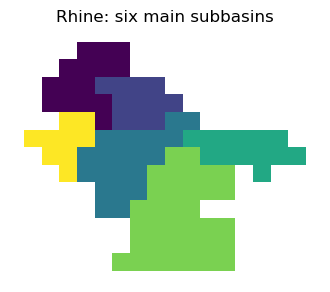

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
basin_map = gpd.read_file(RDA.shp_path)
fig, ax = plt.subplots(figsize = (4,4))
basin_map.plot(ax=ax,column="ID")
ax.set_axis_off()
ax.set_title('Rhine: six main subbasins');

## 4. Data preparation

In [4]:
from demo_summer_school import demo_prepare_GRACE_Mascon
demo_prepare_GRACE_Mascon(isDiagonal=True)

Start to pre-process GRACE to obtain basin-wise TWS over places of interest...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-19 15:13:55
Start to pre-process GRACE to obtain grid-wise TWS over places of interest...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-19 15:13:56

Start to pre-process GRACE to obtain COV over places of interest...
2005-01_0.npy
2005-02_0.npy
2005-03_0.npy
2005-04_0.npy
2005-05_0.npy
2005-06_0.npy
2005-07_0.npy
2005-08_0.npy
2005-09_0.npy
2005-10_0.npy
2005-11_0.npy
2005-12_0.npy
Finished: 2025-08-19 15:14:51


In [5]:
RDA.prepare_Forcing() # this does not work on Windows system. But we have pre-saved data so that windows user can skip this step


Data preparation...
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-18 21:25:48


## 5. Data assimilation

In [5]:
RDA.single_run()
!mpiexec -n 11 python -u demo_summer_school.py OL
!mpiexec -n 11 python -u demo_summer_school.py DA


Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [53.2, 46.3], lon- [3.8, 12.2]
Forcing field: ERA5

Initializing model states: cold
Guess cold states.
Spin up run for 2004-10-01 to 2004-12-31 (92 days)

===== RUN from 2004-10-01 to 2004-12-31 =====

Doing year/month 200410
...............................
Doing year/month 200411
..............................
Doing year/month 200412
...............................
Finished

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [53.2, 46.3], lon- [3.8, 12.2]
Forcing field: ERA5

Start to generate ensembles with given perturbation...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-19 15:15:23

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [53.2, 46.3], lon- [3.8, 12.2]
Forcing field: ERA5

Initializing model states: warm

===== RUN from 2005-01-01 to 2005-12-31 =====

Doing year/month 200501
...............................
Doing year/month 200502
......

---
## 6. Please go to another notebook for the visualization ==> **Visualization.ipynb**